# Декораторы

Для начала необходимо определить, что представляют собой декораторы. Декораторы не являются генераторами или итераторами и не имеют никакого отношения к этим паттернам программирования. Декораторы представляют собой обёртки, которые накладываются на функции или классы в языке Python с целью изменения их поведения. Изначально мы имеем функцию, которая выполняет определённую задачу. При применении декоратора, которым, как правило, является другая функция, поведение исходной функции изменяется.

Декораторы позволяют разработчикам писать код гибко, сохраняя возможность расширять функциональность без изменения самой функции. Например, если нам необходимо вычислять время работы алгоритма, и этот процесс нужно использовать многократно, мы не будем повторять код вычисления времени в каждой функции. Вместо этого мы создаём декоратор, который добавляет необходимый функционал ко всем функциям, требующим такого дополнения.

**Декоратор представляет собой функцию, которая принимает другую функцию в качестве аргумента и возвращает новую функцию.**

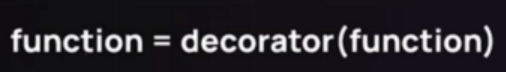

Ключевое понятие декоратора заключается в его способности изменять поведение функции. Однако такой подход может быть неудобен с точки зрения читаемости кода, поэтому для улучшения восприятия был введён так называемый синтаксический сахар. Это позволяет упростить применение декоратора, указав его непосредственно перед определением функции, которую мы хотим модифицировать.

**Если наша цель — не просто сохранить исходную функциональность функции, а сразу дополнить её дополнительными возможностями**, то на этапе её создания мы можем использовать символ «@», указав имя декоратора перед объявлением функции. В этом случае декоратор автоматически обёртывает функцию, и она будет выполнять дополнительные задачи, помимо исходной.

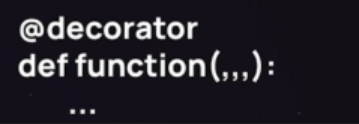

Существует два подхода к использованию декораторов:

- в первом случае мы можем переопределить функцию в любую переменную, не обязательно в «function». При этом исходный функционал функции сохраняется, но её поведение изменяется, так как она обёрнута в декоратор.

- во втором случае, на этапе создания функции, мы сразу же применяем декоратор, и в дальнейшем работаем уже с модифицированной функцией, не сохраняя её первоначальную форму.


In [2]:
def null_deco(func):
    print('Начало обертки')
    result = func
    print(f'{result=}')
    print('Конец обертки')
    return result

def greet():
    return 'Hello'

greet = null_deco(greet)
print(greet())

Начало обертки
result=<function greet at 0x000002CB56DF1C60>
Конец обертки
Hello


In [3]:
@null_deco
def greet():
    return 'Hello'

print(greet())

Начало обертки
result=<function greet at 0x000002CB56DF28E0>
Конец обертки
Hello


# Стандарт записи декоратора

In [7]:
def uppercase(func): # название декоратора и передача функции
    def wrapper(): # работа обёртки
        original_result = func()        
        if isinstance(original_result, str):
            print('*Обработка декоратором*')
            modified_result = original_result.upper()
        else:
            raise TypeError(f'Выходное значение функции не является строкой, а является {type(original_result)}')
        return modified_result
    return wrapper
        
@uppercase
def greet():
    return 'Hello'

@uppercase
def greet_d():
    return {'Hello':'World'}

print(greet())
print(greet_d())

*Обработка декоратором*
HELLO


TypeError: Выходное значение функции не является строкой, а является <class 'dict'>

Как известно, при создании функции внутри другой функции происходит замыкание переменных. Все локальные переменные, находящиеся на уровне выше, то есть внутри «uppercase», передаются в функционал функции «wrapper» аналогичным образом. Функции «wrapper» не требуется принимать на вход другую функцию.

Внутри функции «wrapper» вызывается исходная функция, и возвращается её результат, но с буквами в верхнем регистре. Этот результат является исключительно выходом функции «wrapper». Внутри функции «uppercase» возвращается функция «wrapper». Таким образом, декоратор работает корректно, возвращая функцию. Функция «wrapper», в свою очередь, возвращает строку с буквами в верхнем регистре. Функция «greet» фактически выполняет роль функции «wrapper», дополняя свой функционал. Она может быть вызвана аналогичным образом.

### В старом шаблоне, описанный декоратор будет выглядеть вот так

Если декоратор вместо возвращения другой функции будет возвращать какой-либо результат, то в таком случае мы не сможем вызвать функцию «greet». Мы исключим создание функции «wrapper» внутри декоратора и оставим только основной функционал. Рассмотрим декоратор «uppercase», который принимает на вход функцию. Результат выполнения этой функции сохраняется в переменной «original_result». То есть функция вызывается, и её результат сохраняется.

В переменной «modified_result» сохраняется изменённый результат, представляющий собой преобразование «original_result.upper()». Таким образом, все буквы в строке «Hello!» становятся заглавными. В завершение возвращается «modified_result».

Весь функционал нашего декоратора «uppercase» заключается в следующем. Мы применяем его к функции «greet», которая изначально возвращает строку «Hello!», и затем пытаемся вызвать эту функцию

Если мы попытаемся вызвать функцию в текущем состоянии, то получим ошибку «’str’ object is not callable». Это указывает на то, что объект типа строка не может быть вызван как функция

In [8]:
def uppercase(func):
    original_result = func()
    modified_result = original_result.upper()
    return modified_result

@uppercase
def greet():
    return 'hello'

print(greet())


TypeError: 'str' object is not callable